In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_excel('income.xlsx')
df

,Name,Age,Income
0,Fahima,27,70000
1,Nakib,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Juthy,42,150000
5,Audity,39,155000
6,Nargis,41,160000
7,Brad,38,162000
8,Tom,36,156000
9,Dipika,35,130000


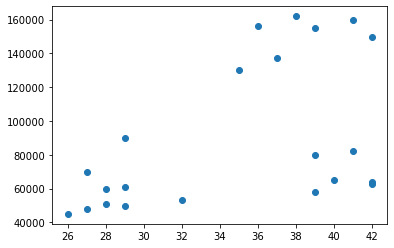

In [7]:
plt.scatter(df['Age'],df['Income'])

km=KMeans(n_clusters=3)
km

In [11]:
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [12]:
df['Cluster']=y_predicted
df

,Name,Age,Income,Cluster
0,Fahima,27,70000,2
1,Nakib,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Juthy,42,150000,1
5,Audity,39,155000,1
6,Nargis,41,160000,1
7,Brad,38,162000,1
8,Tom,36,156000,1
9,Dipika,35,130000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


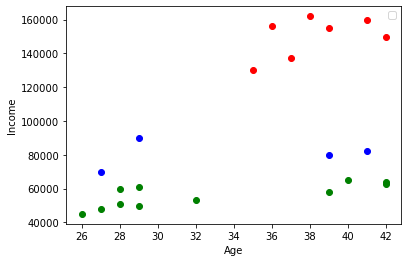

In [14]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [15]:
scaler=MinMaxScaler()

In [18]:
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

df

,Name,Age,Income,Cluster
0,Fahima,0.0625,0.213675,2
1,Nakib,0.1875,0.384615,2
2,Mohan,0.1875,0.136752,0
3,Ismail,0.1250,0.128205,0
4,Juthy,1.0000,0.897436,1
5,Audity,0.8125,0.940171,1
6,Nargis,0.9375,0.982906,1
7,Brad,0.7500,1.000000,1
8,Tom,0.6250,0.948718,1
9,Dipika,0.5625,0.726496,1


In [19]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [20]:
df['cluster']=y_predicted
df

,Name,Age,Income,Cluster,cluster
0,Fahima,0.0625,0.213675,2,0
1,Nakib,0.1875,0.384615,2,0
2,Mohan,0.1875,0.136752,0,0
3,Ismail,0.1250,0.128205,0,0
4,Juthy,1.0000,0.897436,1,1
5,Audity,0.8125,0.940171,1,1
6,Nargis,0.9375,0.982906,1,1
7,Brad,0.7500,1.000000,1,1
8,Tom,0.6250,0.948718,1,1
9,Dipika,0.5625,0.726496,1,1


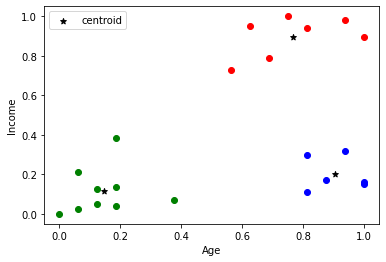

In [24]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [25]:
km.cluster_centers_

array([[0.14583333, 0.11633428],
       [0.76785714, 0.8974359 ],
       [0.90625   , 0.2022792 ]])

In [27]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

C:\Users\Azrin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


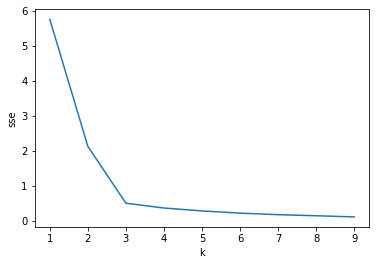

In [29]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_rng,sse)